<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import seaborn as sns

In [3]:
df = pd.read_excel('/Users/maartenk/Documents/git/CookBooks/Sources/weer.xls')#, index_col='jaar')

In [4]:
df_ = pd.read_excel('/Users/maartenk/Documents/git/CookBooks/Sources/intrest_rate.xlsx', index_col='Year')

In [5]:
df_ = df_.dropna()

In [6]:
df_.shape

(702, 3)

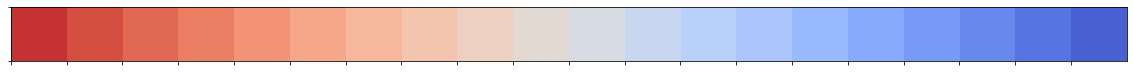

In [7]:
sns.palplot(sns.color_palette('coolwarm', 20)[::-1])

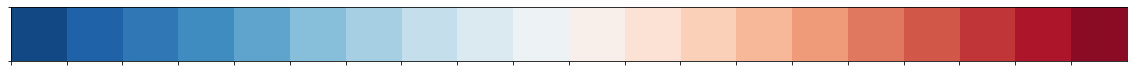

In [8]:
sns.palplot(sns.color_palette('RdBu_r',20))

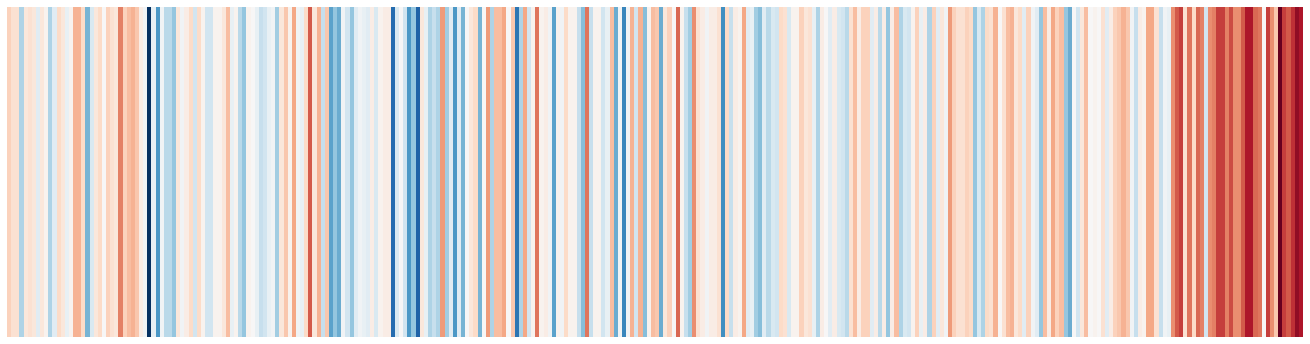

In [9]:
temps = df['jaargen'][::-1]
# temps = temps_bremen
# temps = temps_berlin_brandenburg




stacked_temps = np.stack((temps, temps))

vmin = 5.9
vmax = 11
## plotting
###############
plt.figure(figsize=(18,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40 )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
# plt.savefig("stripes.png", bbox_inches = 'tight',
#     pad_inches = 0, dpi=400)

In [10]:
df_['rolling10'] = df_['Nominal'].rolling(10).mean()

import numpy
x=df_.index
y=df_['Nominal']


# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

source = 'https://www.bankofengland.co.uk/working-paper/2020/eight-centuries-of-global-real-interest-rates-r-g-and-the-suprasecular-decline-1311-2018'

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


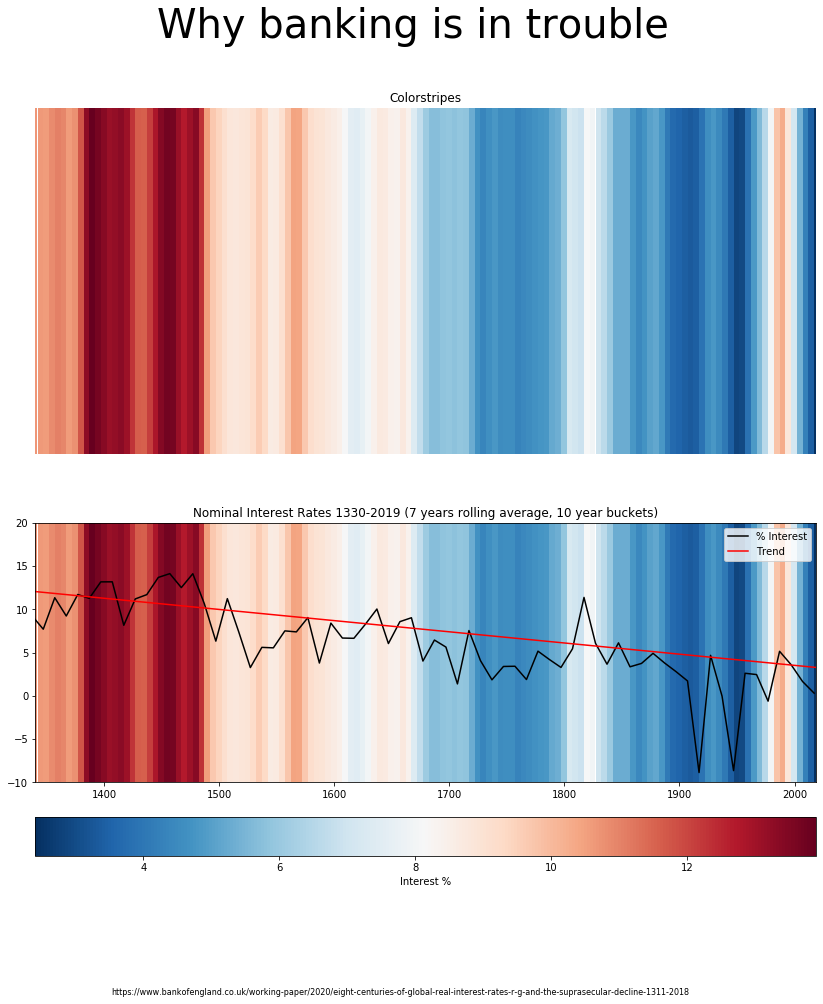

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np
from matplotlib.offsetbox import AnchoredText

plt.rcParams['font.family'] = 'Open Sans'

# URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

# df = pd.read_fwf(
#     URL,
#     skiprows=(0, 1, 2, 4),
#     index_col=0,
# )

year_mean = df_['rolling10'][10::5] #plotting every 5th; causes some misalignment
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(2, 1, 2)
ax2 = fig.add_subplot(2, 1, 1)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, -10), 4.999, 30) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
# col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

ax1.plot(df_['Real'][10::10], label = '% Interest', color='black')
ax1.plot(x,p(x),"r-", label = 'Trend')

for ax in (ax1, ax2):
    ax.set_ylim(-10, 20)
    ax.set_xlim(1340, 2019)

ax1.set_yticks([-10,-5,0,5,10,15, 20])


ax1.set_title('Nominal Interest Rates 1330-2019 (7 years rolling average, 10 year buckets)')
ax2.set_title('Colorstripes')
ax2.set_axis_off()
fig.colorbar(col1, ax=ax1, label='Interest %',orientation="horizontal", pad=0.1)
ax1.legend()
# fig.colorbar(col2, ax=ax2, label='Interest %')



#add annotation
# at = AnchoredText(f'Source: {source}',
#                   prop=dict(size=10), frameon=True,
#                   loc='lower left')
# at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')

# ax1.add_artist(at)

fig.suptitle('Why banking is in trouble', fontsize=40)
fig.text(.2,0,source, fontsize='8');
# fig.tight_layout()
fig.savefig('comparison.png', dpi = 600, bbox_inches='tight')


In [28]:
fig.

AttributeError: 'Figure' object has no attribute 'display'

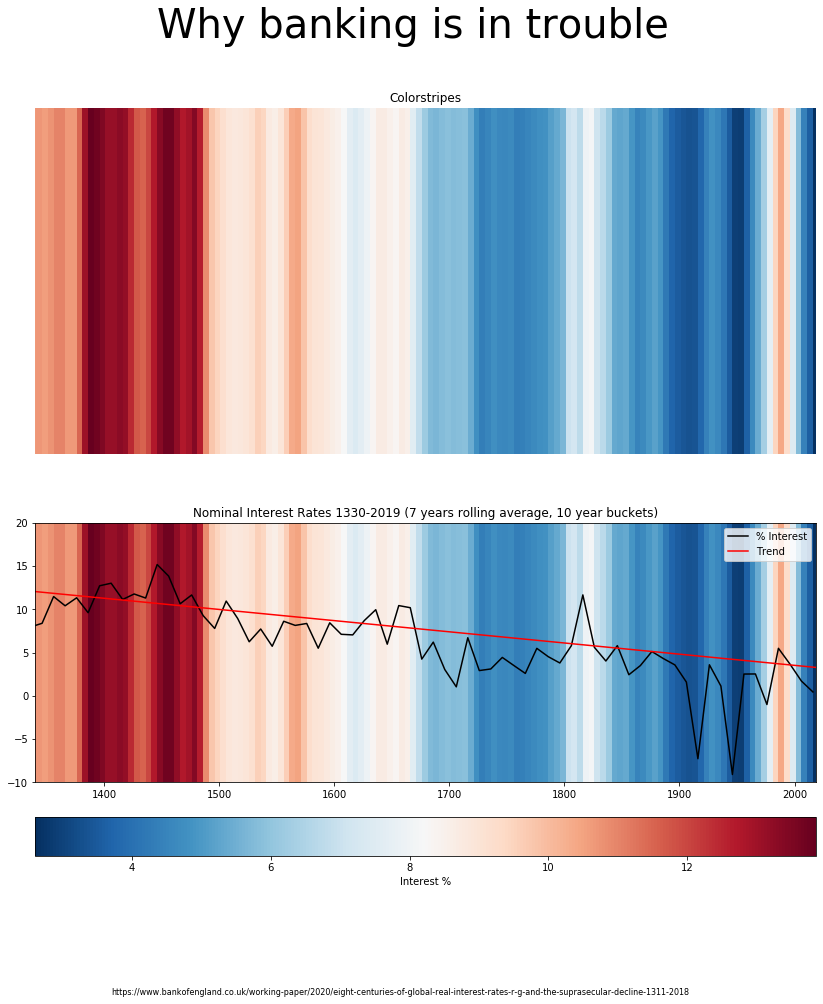

In [458]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np
from matplotlib.offsetbox import AnchoredText

plt.rcParams['font.family'] = 'Open Sans'

# URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

# df = pd.read_fwf(
#     URL,
#     skiprows=(0, 1, 2, 4),
#     index_col=0,
# )

year_mean = df_['rolling10'][10::5] #plotting every 5th; causes some misalignment
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(2, 1, 2)
ax2 = fig.add_subplot(2, 1, 1)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, -10), 4.999, 30) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
# col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

ax1.plot(df_['Real'][10::10], label = '% Interest', color='black')
ax1.plot(x,p(x),"r-", label = 'Trend')

for ax in (ax1, ax2):
    ax.set_ylim(-10, 20)
    ax.set_xlim(1340, 2019)

ax1.set_yticks([-10,-5,0,5,10,15, 20])


ax1.set_title('Nominal Interest Rates 1330-2019 (7 years rolling average, 10 year buckets)')
ax2.set_title('Colorstripes')
ax2.set_axis_off()
fig.colorbar(col1, ax=ax1, label='Interest %',orientation="horizontal", pad=0.1)
ax1.legend()
# fig.colorbar(col2, ax=ax2, label='Interest %')



#add annotation
# at = AnchoredText(f'Source: {source}',
#                   prop=dict(size=10), frameon=True,
#                   loc='lower left')
# at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')

# ax1.add_artist(at)

fig.suptitle('Why banking is in trouble', fontsize=40)
fig.text(.2,0,source, fontsize='8');
# fig.tight_layout()
fig.savefig('comparison.png', dpi = 600, bbox_inches='tight')


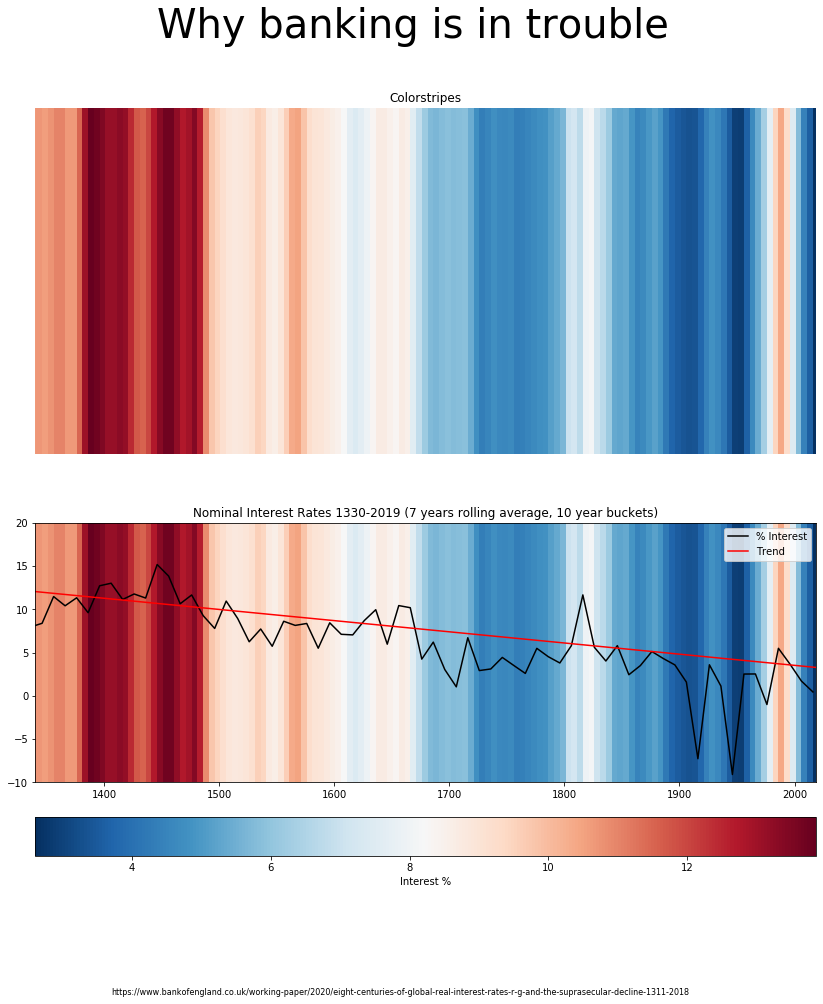

In [458]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np
from matplotlib.offsetbox import AnchoredText

plt.rcParams['font.family'] = 'Open Sans'

# URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

# df = pd.read_fwf(
#     URL,
#     skiprows=(0, 1, 2, 4),
#     index_col=0,
# )

year_mean = df_['rolling10'][10::5] #plotting every 5th; causes some misalignment
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(2, 1, 2)
ax2 = fig.add_subplot(2, 1, 1)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, -10), 4.999, 30) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
# col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

ax1.plot(df_['Real'][10::10], label = '% Interest', color='black')
ax1.plot(x,p(x),"r-", label = 'Trend')

for ax in (ax1, ax2):
    ax.set_ylim(-10, 20)
    ax.set_xlim(1340, 2019)

ax1.set_yticks([-10,-5,0,5,10,15, 20])


ax1.set_title('Nominal Interest Rates 1330-2019 (7 years rolling average, 10 year buckets)')
ax2.set_title('Colorstripes')
ax2.set_axis_off()
fig.colorbar(col1, ax=ax1, label='Interest %',orientation="horizontal", pad=0.1)
ax1.legend()
# fig.colorbar(col2, ax=ax2, label='Interest %')



#add annotation
# at = AnchoredText(f'Source: {source}',
#                   prop=dict(size=10), frameon=True,
#                   loc='lower left')
# at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')

# ax1.add_artist(at)

fig.suptitle('Why banking is in trouble', fontsize=40)
fig.text(.2,0,source, fontsize='8');
# fig.tight_layout()
fig.savefig('comparison.png', dpi = 600, bbox_inches='tight')


y=-0.012928x+(29.380418)


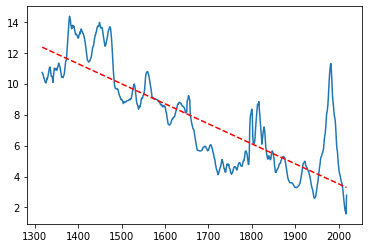

In [308]:
import numpy
x=df_.index
y=df_['Nominal']
plt.plot(x,y)

# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

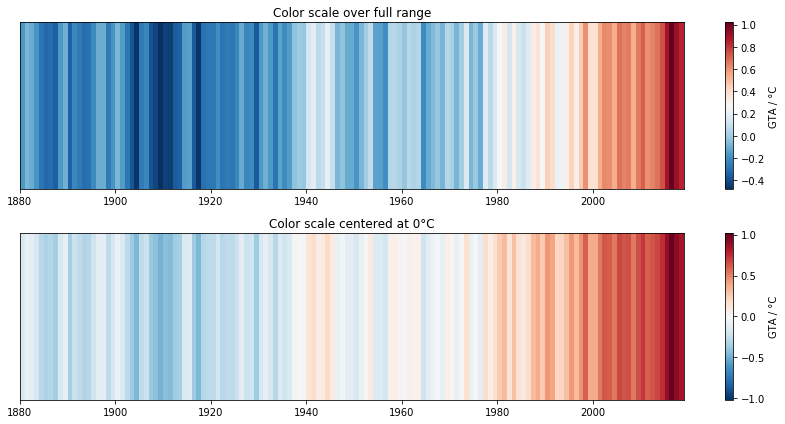

In [439]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Open Sans'

URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

df = pd.read_fwf(
    URL,
    skiprows=(0, 1, 2, 4),
    index_col=0,
)
year_mean = df['No_Smoothing']
# year_mean = df_['norm']
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, 0), 1, 1) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

for ax in (ax1, ax2):
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlim(1880, 2019)

ax1.set_title('Color scale over full range')
ax2.set_title('Color scale centered at 0°C')
fig.colorbar(col1, ax=ax1, label='GTA / °C')
fig.colorbar(col2, ax=ax2, label='GTA / °C')
fig.tight_layout()
# fig.savefig('comparison.png', bbox_inches='tight')

In [459]:
!pwd

/Users/maartenk/Documents/git
